## This project has two parts. 

In the first part, you will run a regression, and identify and remove the 10% of points that have the largest residual errors. Then you’ll remove those outliers from the dataset and refit the regression, just like the strategy that Sebastian suggested in the lesson videos.

In the second part, you will get acquainted with some of the outliers in the Enron finance data, and learn if/how to remove them.

### Slope of Regression with Outliers

Implementing the algorithm for improving a regression, by removing outliers. To summarize, what you'll do is fit the regression on all training points discard the 10% of points that have the largest errors between the actual y values, and the regression-predicted y values refit on the remaining points.

In [2]:
import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


In [5]:
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "rb") )


In [4]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner_new import outlierCleaner        # heb outlier_cleaner van andere github gast gepakt

In [6]:
### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "rb") )

In [7]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

In [8]:
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [9]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
  
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)

LinearRegression()

### Slope of Regression with Outliers

In [10]:
print ('The slope for this regression is: ', reg.coef_)

The slope for this regression is:  [[5.07793064]]


### Score of Regression with Outliers
What is the score you get when using regression to make predictions with the test data?

In [11]:
print ("The score when using regression to make predictions with the test data : "), reg.score(ages_test,net_worths_test)

The score when using regression to make predictions with the test data : 


(None, 0.8782624703664675)

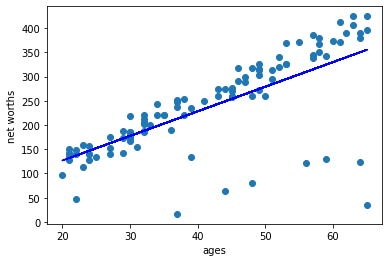

In [12]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.xlabel("ages")
plt.ylabel("net worths")
plt.show()

In [13]:
predictions = reg.predict(ages_train)
len(predictions)

90

In [14]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)                                           # this cleaning is based on training-data (`ages_train`)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print ("your regression object doesn't exist, or isn't name reg")
    print ("can't make predictions to use in identifying outliers")



In [79]:
# hiermee zijn dus 9 values removed
len(cleaned_data)

81

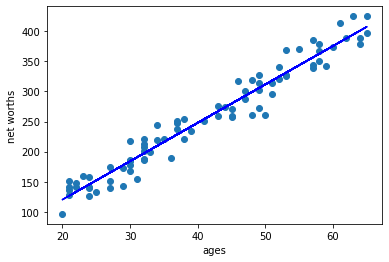

In [17]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print ("you don't seem to have regression imported/created,")
        print ("   or else your regression object isn't named reg")
        print ("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print ("outlierCleaner() is returning an empty list, no refitting to be done")


## Slope of Regression without Outliers

In [18]:
print ('The slope for this regression is : ', reg.coef_)

The slope for this regression is :  [[6.36859481]]


## Score After Cleaning

In [39]:
print ("The score using regression to make predictions with the test data : ", reg.score(ages_test,net_worths_test))

The score using regression to make predictions with the test data :  0.8782624703664675


# Enron Outliers

In [19]:
import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

Reads in the data (in dictionary form) and converts it into a sklearn-ready numpy array. Since there are two features being extracted from the dictionary (“salary” and “bonus”), the resulting numpy array will be of dimension N x 2, where N is the number of data points and 2 is the number of features. This is perfect input for a scatterplot; we’ll use the matplotlib.pyplot module to make that plot. 

In [21]:
### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "rb") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)           # convert to numpy array

In [24]:
type(data)

numpy.ndarray

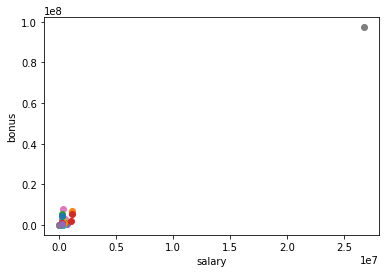

In [27]:
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )
    
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [28]:
# To find the value of largest bonus (outlier here)
salary_max, bonus_max = data.max(axis = 0)
bonus_max

97343619.0

In [29]:
salary_max

26704229.0

In [31]:
for k in data_dict.keys():
    if bonus_max == data_dict[k]['bonus']:
        print ("Person having maximum bonus : ", k)
        break    

Person having maximum bonus :  TOTAL


In [33]:
# oefening dirk:
for k in data_dict.keys():
    if salary_max == data_dict[k]['salary']:
        print ("Person having maximum salary : ", k)
        break   

Person having maximum salary :  TOTAL


In [22]:
data_dict['TOTAL']

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

So we are getting the __Total__ of that column as an outlier.  
The spreadsheet added up all the data points for us, and we need to take that "point" out.

### Removing the outlier
(This step must have been done earlier but for future reference and study , i have repeated the steps)

In [34]:
data_dict.pop('TOTAL')
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

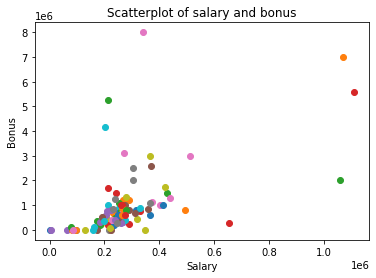

In [41]:
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )
    
plt.title('Scatterplot of salary and bonus')
plt.xlabel("Salary")
matplotlib.pyplot.ylabel("Bonus")
matplotlib.pyplot.show()


## Observe : There are four more outliers

In [50]:
data_sort = data[ data[:,1].argsort() ]
outlier_bonus = []
for i in range(-5,0):
    outlier_bonus.append( data_sort[i][1] )

outlier_bonus

[4175000.0, 5249999.0, 5600000.0, 7000000.0, 8000000.0]

In [62]:
data_sort.shape

(94, 2)

In [68]:
data_sort[-5:,:]

array([[ 201955., 4175000.],
       [ 213999., 5249999.],
       [1111258., 5600000.],
       [1072321., 7000000.],
       [ 339288., 8000000.]])

## Identifying the corresponding persons

In [52]:
for k in data_dict.keys():
    if data_dict[k]['bonus'] in outlier_bonus:
        print (" {} had bonus of {} . ".format(k, data_dict[k]['bonus']))

 LAVORATO JOHN J had bonus of 8000000 . 
 LAY KENNETH L had bonus of 7000000 . 
 BELDEN TIMOTHY N had bonus of 5249999 . 
 SKILLING JEFFREY K had bonus of 5600000 . 
 ALLEN PHILLIP K had bonus of 4175000 . 


In [69]:
for k,v in data_dict.items(): 
	salary =float(v.get("salary"))
	bonus =float(v.get("bonus"))
	if(salary>1000000 and bonus>=5000000):
		print(k)

LAY KENNETH L
SKILLING JEFFREY K
